# Plots for Section 6

In [1]:
import sys
import sympy as sp

print("Python version", sys.version)
print("Sympy version", sp.__version__)

import matplotlib
import numpy
import scipy

print("Matplotlib version", matplotlib.__version__)
print("Numpy version", numpy.__version__)
print("Scipy version", scipy.__version__)

### FLINT is necessary for this section
print("FLINT version = 2.8.4")
print("ARB version = 2.22.1")

from datetime import date

print("Today:", date.today())

Python version 3.9.10 (main, Jan 15 2022, 11:48:00) 
[Clang 13.0.0 (clang-1300.0.29.3)]
Sympy version 1.10.1
Matplotlib version 3.5.1
Numpy version 1.22.3
Scipy version 1.8.0
FLINT version = 2.8.4
ARB version = 2.22.1
Today: 2022-04-04


In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 13})

It is convenient to control lots of display parameters during plotting, so we define a dedicated function for that.

In [3]:
def lplot(fun,
          l, r,        # xlim
          npts=100,
          xmargin=0.1,          
          fn=None,     # filename to save the figure
          yl=None,     # y_left
          yr=None,     # y_right
          xlabel=None,
          ylabel=None,
          xticks=None,
          yticks=None,
          title=None,
          legend=False,
          x0 = 0,      # position of the y-axis
          y0 = 0,      # position of the x-axis
          legend_anchor=None, # (x, y) coordinate of the legend box
          figsize=None,
          **kwargs     # keywords to pass to plt.plot
    ):
    """
    Lambda-function plot, with boundaries and number of points.
    This function reproduces the images inserted into the paper.
    
    Example of usage: lplot(lambda x: x**2, -1, 1)
    """
    ### Configure the plot appearance
    if figsize is not None:
        plt.figure(figsize=figsize)
    plt.box(on=False)
    plt.xlim(l-xmargin, r+xmargin) ## do we extend it to the right?
    
    if yl is not None and yr is not None:
        plt.ylim(yl, yr)
    
    plt.axhline(y=y0, color='k')
    plt.axvline(x=x0, color='k')  
    plt.grid(True, linestyle='--')
    
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(xlabel)
    if xticks is not None:
        plt.xticks(xticks)
    if yticks is not None:
        plt.yticks(yticks)
        
    xargs = np.linspace(l,r,npts)

    plt.plot(xargs, list(map(fun, xargs)), color='darkorange', **kwargs)
    if title is not None:
        plt.title(title)
        
    if legend:
        if legend_anchor is None:
            plt.legend(loc='best')
        else:
            plt.legend(loc='best', bbox_to_anchor=legend_anchor)
        
    if fn is not None:
        plt.savefig(fn, bbox_inches='tight')

## The explicit functions

We are going to make the plots of $\alpha(\lambda)$, $\beta(\lambda)$, $\gamma_2(\lambda)$ and
$\sigma_2(\lambda)$.

In [4]:
# According to NIST
# https://dlmf.nist.gov/9.9
a1 = -2.3381074105
Aiprime_of_a1 = 0.7012108227
a1prime = -1.0187929716
Ai_of_a1prime = 0.5356566560

In [5]:
def gamma_2(lam):
    return (
        2**(-2/3)
        * lam**(5/6)
        * np.exp( (lam-1)/6 )
        / Aiprime_of_a1
    )

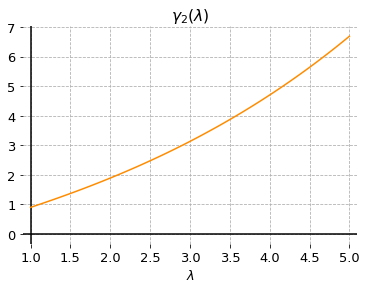

In [6]:
lplot(gamma_2,
      l=1,
      r=5,
      x0=1,
      title=r"$\gamma_2(\lambda)$",
      xlabel=r"$\lambda$",
      
      #### the following line contained the relative path to the journal paper
      # fn="../../digraphs-journal-paper/journal-paper/images/gamma_2.pdf",
      xmargin=0.1,
      xticks=np.linspace(1,5, 9))

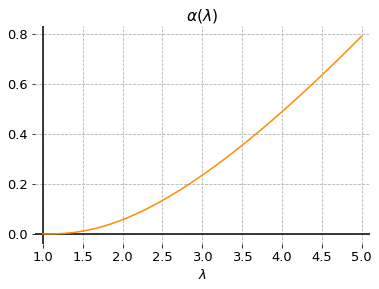

In [7]:
def alpha(lam):
    return (
        (lam**2 - 1) / (2 * lam)
        - np.log(lam)
    )

lplot(alpha,
      l=1,
      r=5,
      x0=1,
      title=r"$\alpha(\lambda)$",
      xlabel=r"$\lambda$",
      
      #### the following line contained the relative path to the journal paper
      # fn="../../digraphs-journal-paper/journal-paper/images/alpha.pdf",
      xmargin=0.1,
      xticks=np.linspace(1,5, 9))

In [8]:
def beta(lam):
    return (
        2**(-1/3)
        * lam**(-1/3)
        * (lam - 1)
    )

lplot(beta,
      l=1,
      r=5,
      x0=1,
      title=r"$\beta(\lambda)$",
      xlabel=r"$\lambda$",
      
      #### the following line contained the relative path to the journal paper
      # fn="../../digraphs-journal-paper/journal-paper/images/beta.pdf",
      xmargin=0.1,
      xticks=np.linspace(1,5, 9))

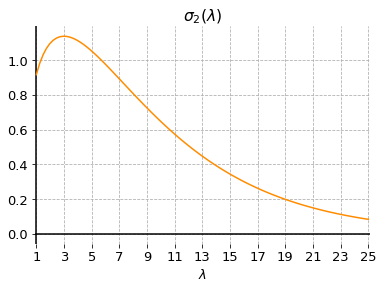

In [9]:
def sigma_2(lam):
    return -(
        lam**0.5
        * np.exp(-(lam-1)/6)
        / (
            2 * a1prime
            * Ai_of_a1prime
        )
    )

lplot(sigma_2,
      l=1,
      r=25,
      x0=1,
      title=r"$\sigma_2(\lambda)$",
      xlabel=r"$\lambda$",
      
      #### the following line contained the relative path to the journal paper
      # fn="../../digraphs-journal-paper/journal-paper/images/sigma_2.pdf",
      xmargin=0.1,
      xticks=np.linspace(1,25, 13))

## Integrals of Airy functions

In [10]:
import flint
from flint import acb

from cmath import sqrt, pi

Luckily, we can use a built-in Airy function from `flint.acb`

In [11]:
airy_ai = acb.airy_ai

Let us verify that $\gamma_1 \approx 0.488736706$.

In [12]:
flint.ctx.dps = 50
acb.integral(
    lambda t, _:
    acb(1) / airy_ai(-acb(2)**(acb(1)/acb(3)) * t),
    acb(0,-100), acb(0,100)
) * acb(2)**(-acb(1)/acb(3)) / (acb(0, 2) * acb.pi())

[0.48873670615299687371961054991725147943001070346 +/- 3.89e-48] + [+/- 1.15e-49]j

We can also compute the first zero of the Airy function with high precision using binary search (but we won't).

In [13]:
def acb2float(r):
    """
    Convert FLINT ACB to float (for plotting purposes)
    """
    re = float(r.real.mid().str(8, radius=False))
    return float(re)

### Acyclic multidigraphs

$$
    \varphi(\mu) = 2^{-2/3} e^{-\mu^3/6}
    \cdot \dfrac{1}{2 \pi i}
    \int_{-i\infty}^{i \infty}
    \dfrac{e^{-\mu s}}{\mathrm{Ai}(-2^{1/3}s)} ds
$$

In [14]:
# Well, now we don't need to be really precise.

flint.ctx.dps = 4

In [15]:
def phi(mu):
    return (
        acb(2)**(-acb(1)/acb(3))
        * acb.exp(-mu**3 / acb(6))
        / (acb(0, 2) * acb.pi())
        * acb.integral(
            lambda s, _:
            acb.exp(-mu * s)
            / airy_ai(-acb(2)**(acb(1)/acb(3)) * s),
            acb(0,-30), acb(0,30)
        )
    )

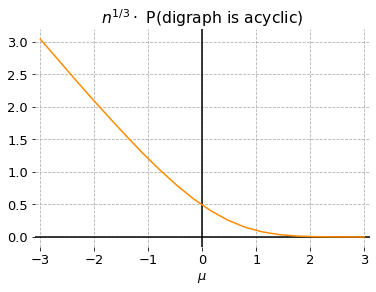

In [16]:
lplot(
    lambda mu: acb2float(phi(acb(mu))),
    -3, 3, npts=20,
    title=r"$n^{1/3} \cdot$ P(digraph is acyclic)",
    xlabel=r"$\mu$"
)

### Elementary multidigraphs

In [17]:
def p_elem(mu):
    return -(
        acb(2)**(-acb(2)/acb(3))
        * acb.exp(-mu**3 / acb(6))
        / (acb(0, 2) * acb.pi())
        * acb.integral(
            lambda s, _:
            acb.exp(-mu * s)
            / airy_ai(-acb(2)**(acb(1)/acb(3)) * s,
                     derivative=1),
            acb(0,-30), acb(0,30)
        )
    )

In [18]:
lplot(
    lambda mu: acb2float(p_elem(acb(mu))),
    -3, 3, npts=100,
    title=r"P(digraph is elementary)",
    xlabel=r"$\mu$",
    figsize=(6,5),
    yticks=np.linspace(0, 1, 11),

    #### the following line contained the relative path to the journal paper    
    # fn="../../digraphs-journal-paper/journal-paper/images/proba_elem_MDnp.pdf"
)

# One bicyclic component

Using FLINT gives a very good precision, but is slow for plotting purposes.
For this reason, we switch to `scipy.integrate`.
The integration function resorts to some old FORTRAN built-ins, and is not very friendly with complex numbers.
It is still relatively easy to extend a real-valued integral to a complex-valued (with a complex argument) by linearity of integration. We need to provide a bit more code, for the complex integration trajectories, but gain some speed of code execution.

In [19]:
import scipy.integrate as integrate
import math

In [20]:
def complex_quad(fun, left, right):
    """
    Complex integration routine.
    Assume that `left` and `right` are complex numbers,
    and we assume a linear trajectory `s = alpha left + (1 - alpha) right`.
    `fun` is a complex-argument function which returns a complex value.
    Invokes `scipy.integrate.quad` with real-valued integration as a subroutine.
    
    N.B. Only finite limits are supported.
    """
    fun_re = lambda z: fun(z).real
    fun_im = lambda z: fun(z).imag
    int_re = integrate.quad(
        lambda t: fun_re(
            t * (right - left) + left
        ),
        0, 1
    )
    int_im = integrate.quad(
        lambda t: fun_im(
            t * (right - left) + left
        ),
        0, 1
    )
    int_cmplx = complex(int_re[0], int_im[0])
    result = int_cmplx * (right - left)
    abserr = abs(complex(int_re[1], int_im[1]) * (right - left))
    return (result, abserr)

#### Three paths of integration

Recall the definition of the generalised Airy function:
$$
    \mathrm{Ai}(r; x) =
    (-1)^r \dfrac{1}{2 \pi i}
    \int_{\mathcal C}
    t^r e^{-xt + t^3/3}
    dt,
$$
where the contour $ \mathcal C $ is a union of three line segments.

In order to construct the generalised Airy function, we need to join three segments.
Copy-pasting is a bit dangerous, but it has been verified
many times, so there should be no mistake in the code.

In [21]:
def I1(r, x, rlimit = 40):
    """
    For simplicity, we take the integration angle pi/4.
    Later we can update to pi/3 have better convergence.
    """
    return complex_quad(
        lambda t: t**r * np.exp(
            -x * t + t**3/3
        ),
        rlimit * (1 - 1j), 1 - 1j
    )

def I2(r, x, rlimit = 40):
    return complex_quad(
        lambda t: t**r * np.exp(
            -x * t + t**3/3
        ),
        1 - 1j, 1 + 1j
    )

def I3(r, x, rlimit = 40):
    return complex_quad(
        lambda t: t**r * np.exp(
            -x * t + t**3/3
        ),
        1 + 1j, rlimit * (1 + 1j)
    )

In [22]:
def AiryAi(r, x, rlimit = 40):
    """
    Generalised Airy function. The third parameter `rlimit` (optional) stands for the limits of integration.
    Returns a tuple whose first element is the value, and the second is the absolute error of integration.
    """
    i1 = I1(r, x, rlimit)
    i2 = I2(r, x, rlimit)
    i3 = I3(r, x, rlimit)
    integral_result = i1[0] + i2[0] + i3[0]
    abserr = i1[1] + i2[1] + i3[1]
    return (
        (-1)**r / (2 * math.pi * 1j) * integral_result
        ,
        abserr
    )

*We can test the numerical values, and compare with Maple and NIST handbook (where possible)*

In [23]:
AiryAi(0, 0)[0]

(0.355028053887817-3.975693351829396e-17j)

In [24]:
AiryAi(0, 1)[0]

(0.1352924163128814-6.736591512822032e-17j)

In [25]:
AiryAi(1, 0)[0]

(-0.2588194037928065-2.208718528794109e-16j)

In [26]:
AiryAi(1, 1)[0]

(-0.15914744129679312+5.4389693771554935e-17j)

In [27]:
AiryAi(-1, 0)[0]

(-0.33333333333333326+1.159577227616907e-16j)

The above value is similar to the definite integral presented in NIST handbook
$$
    \int_0^\infty \mathrm{Ai}(t) dt = \dfrac{1}{3},
    \quad
    \int_{-\infty}^0 \mathrm{Ai}(t) dt = \dfrac{2}{3}.
$$
In this case, the definite integral corresponding to $ \mathrm{Ai}(-1, x) $ should be taken
from $ -\infty $ to $ x $, and the constant of integration is different, however, it still preserves the rational pattern.

We can conclude (empirically, and maybe prove later) that
$$
    \mathrm{Ai}(-1, x) = \int_{-\infty}^x \mathrm{Ai}(t) dt - 1
    = - \int_{x}^{\infty} \mathrm{Ai}(t) dt \, .
$$

$$
    \mathbb P_{\mathsf{one\ bicyclic}}(n, n^{-1}(1 + \mu n^{-1/3}))
    \sim
    \dfrac{1}{8} \cdot \dfrac{1}{2 \pi i}
    \int_{-i \infty}^{i \infty}
    \dfrac{\mathrm{Ai}(-2, \tau)}{(\mathrm{Ai}'(\tau))^2}
    e^{2^{-1/3}\mu \tau - \mu^3/6} d \tau.
$$

Here is the probability that there is only one bicyclic component, if $\mu = 0$:

In [28]:
(
    1/2                  # compensation factor
    * 2**(-2/3 - 1)      # coeff from varphi_{r,0}
    / (2 * np.pi * 1j)   # from Cauchy integral
    *
    complex_quad(
        lambda t:
        AiryAi(-2, -2**(1/3) * t)[0]
        /
        (AiryAi(1, -2**(1/3) * t)[0])**2,
        -20j, 20j
    )[0]
)

(0.12500000000001252-5.987478181050781e-16j)

I was totally surprised when I saw this rational number and we have spent several days trying to prove that it indeed takes this value. We discovered that all the (double) poles have, incidentally, zero residues. Then, together with my coauthors, we have completed the proof.

In [29]:
def p_one_bicyclic(mu):
    return (
        1/2                  # compensation factor
        * 2**(-2/3 - 1)      # coeff from varphi_{r,0}
        / (2 * np.pi * 1j)   # from Cauchy integral
        *
        complex_quad(
            lambda t:
            AiryAi(-2, -2**(1/3) * t)[0]
            /
            (AiryAi(1, -2**(1/3) * t)[0])**2
            * np.exp(- mu * t - mu**3 / 6)
            ,
            -20j, 20j
        )[0]
    )    

/var/folders/8v/b70cv4ms26d1dhx71m9gb65r0000gn/T/ipykernel_10270/1656632478.py:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int_re = integrate.quad(
/var/folders/8v/b70cv4ms26d1dhx71m9gb65r0000gn/T/ipykernel_10270/1656632478.py:19: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int_im = integrate.quad(
/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


CPU times: user 4min 49s, sys: 1.78 s, total: 4min 51s
Wall time: 5min 6s


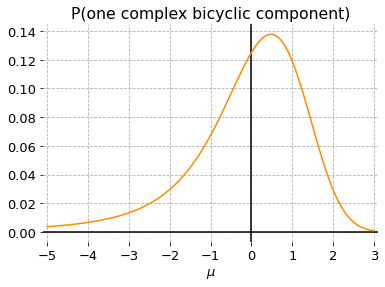

In [30]:
%%time
# Making this plot takes some time

lplot(
    lambda mu: p_one_bicyclic(mu),
    -5, 3, npts=100,
    title=r"P(one complex bicyclic component)",
    xlabel=r"$\mu$",
    xticks=np.linspace(-5, 3, 9),
    # fn="p_one_bicyclic.pdf"
)

Thank you for reading! And good luck with what you are doing.